# Problem Statement

In order to efficiently manage the business and manpower for the coming months, the ABC airlines want to forecast the number of bookings expected for the next two quarters. You are provided with the data for past 19 months (from 26-08-2012 to 25-03-2014) and you have to forecast the values for the next two quarters (26-03-2014 to 25-09-2014).

_Note that here we will be using a validation set and hence we have the forecast values for the next two quarters_


**Data Description**
Both train and validation files have two columns: 'Date' and 'Count'.
- Date: Store the date when the observation was taken
- Count: Holds the number of bookings for the given date

# Reading Time Series Data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("data/train_data.csv")

In [4]:
train.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


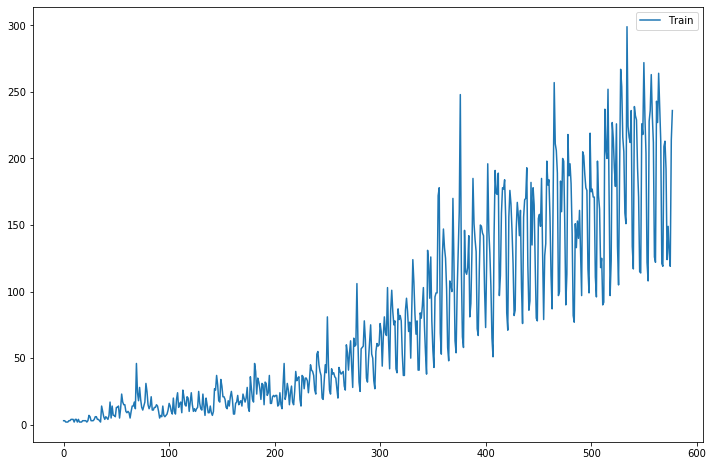

In [5]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train['count'], label='Train')
plt.legend(loc='best')
plt.show()

In [6]:
train.dtypes

Date     object
count     int64
dtype: object

# Convert the object to datetime format

In [7]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')

In [8]:
train.dtypes

Date     datetime64[ns]
count             int64
dtype: object

# Resampling

In [9]:
train.index = train['Date']

In [10]:
print(train.shape)
train.head()

(578, 2)


,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


- We have data at daily level

In [11]:
weekly_data = train.resample('W').mean() 

In [12]:
print(weekly_data.shape)
weekly_data.head()

(84, 1)


,count
Date,
2012-08-26,3.000000
2012-09-02,2.857143
2012-09-09,3.142857
2012-09-16,2.571429
2012-09-23,4.142857


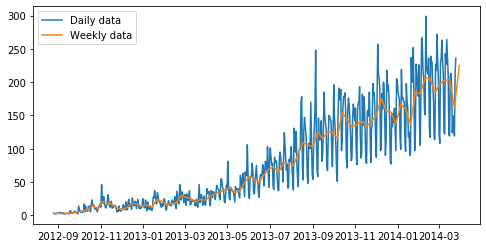

In [13]:
plt.figure(figsize=(8,4))

plt.plot(train.index, train['count'], label='Daily data')
plt.plot(weekly_data.index, weekly_data['count'], label='Weekly data')

plt.legend(loc='best')
plt.show()

# Resample to monthly

In [14]:
monthly = train.resample('M').mean()

In [15]:
print(monthly.shape)
monthly.head()

(20, 1)


,count
Date,
2012-08-31,2.571429
2012-09-30,3.866667
2012-10-31,10.419355
2012-11-30,15.300000
2012-12-31,15.096774


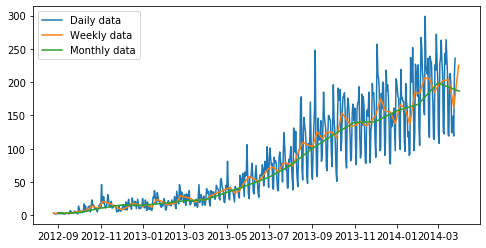

In [16]:
plt.figure(figsize=(8,4))

plt.plot(train.index, train['count'], label='Daily data')
plt.plot(weekly_data.index, weekly_data['count'], label='Weekly data')
plt.plot(monthly.index, monthly['count'], label='Monthly data')


plt.legend(loc='best')
plt.show()

- H = Hourly
- D = Daily
- M = Monthly
- A = Anually
- Q = Quaterly

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

## show documentaiton
## smooth but loss of data --- be careful when you downsample.. (use business sense.... 